In [27]:
import warnings
warnings.filterwarnings("ignore")

import nltk
from textblob import TextBlob
from nltk import corpus     
stop_words = list(corpus.stopwords.words('english'))

nltk.download('punkt')
nltk.download('stopwords') 
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from wordcloud import WordCloud,STOPWORDS

import numpy, pandas, matplotlib.pyplot as medrvp, seaborn, wordcloud
from pandas import read_csv
from plotly import express
import plotly.graph_objects as go

import sklearn
from sklearn import metrics,model_selection,preprocessing,pipeline,preprocessing
from sklearn.utils import resample
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
MdData = read_csv('drugsComTrain_raw.tsv',sep='\t')
MdData.columns=['ID','drugName','condition','review','rating','date','usefulCount']
MdData.head()

,ID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [17]:
MdData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


Text(0.5, 1.0, 'Top Drugs')

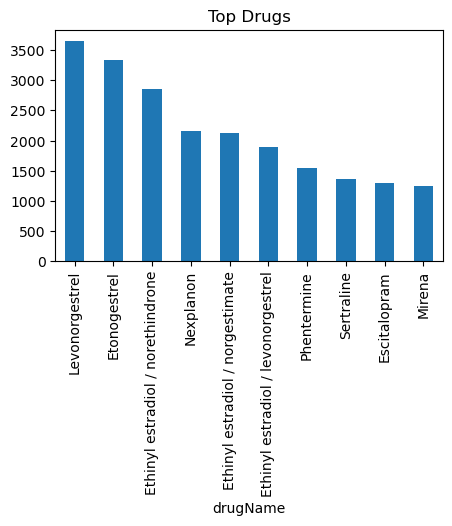

In [28]:
MdData['drugName'].value_counts()[:10].plot(kind='bar', figsize=(5,3))
medrvp.title("Top Drugs")

Total Conditions Enlisted: 884
Total Medicines Enlisted: 3436


Text(0.5, 1.0, 'Top-10 Conditions')

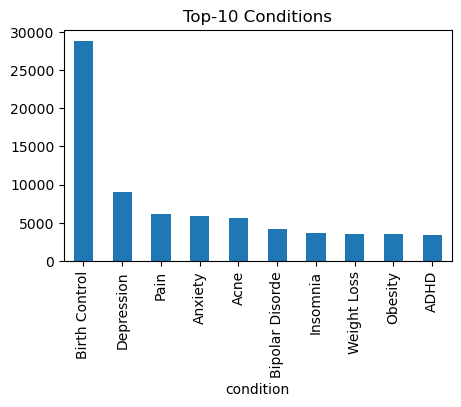

In [31]:
print("Total Conditions Enlisted:",len(MdData['condition'].value_counts().tolist()))
print("Total Medicines Enlisted:",len(MdData['drugName'].value_counts().tolist()))
MdData['condition'].value_counts()[:10].plot(kind='bar', figsize=(5,3))
medrvp.title("Top-10 Conditions")

In [20]:
MdData1=MdData.copy()
rvs=MdData1["review"].tolist()
rvs_stripped=[]
for r in rvs:
    rvs_stripped.append(r.strip('"'))
print(rvs_stripped[0])

It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil


In [21]:
def LemmaMdRv(txtolem):
    return  [lemmatizer.lemmatize(t) for t in txtolem]
def MdRvClean(tx_rvmd):
    stopseng = list(stopwords.words('english'))
    rvpunc_cln=""
    tagwrds=["rt","RT","http","HTTP","https","HTTPS","com","COM"]
    for txrv in tx_rvmd:
        if txrv.isalpha()==True:
            rvpunc_cln+=txrv
        if txrv.isalnum()==False:
            pass
        if txrv==" ":
            rvpunc_cln+=" "
    rvpunc_cln=rvpunc_cln.lower()
    Tokens_MedRev=rvpunc_cln.split()
    MedTokens=[]
    for i in Tokens_MedRev:
        if i not in tagwrds:
            MedTokens.append(i)
    ClndTokensMed=[]
    for j in MedTokens:
        if j not in stopseng:
            ClndTokensMed.append(j)
    ClndTokensMed=LemmaMdRv(ClndTokensMed)
    return ' '.join(ClndTokensMed)
CleanedTxt=[]
for x in rvs_stripped:
    CleanedTxt.append(MdRvClean(x))
MdData1['cleaned_review']=CleanedTxt
MdData1.head()

,ID,drugName,condition,review,rating,date,usefulCount,cleaned_review
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,side effect take combination bystolic mg fish oil
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,son halfway fourth week intuniv became concern...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,used take another oral contraceptive pill cycl...
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,first time using form birth control im glad we...
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,suboxone completely turned life around feel he...


In [86]:
RVCln=MdData1['cleaned_review'].tolist()
rtall=MdData1['rating'].tolist()
rv_plr=[]
for i in RVCln:
    snt_rev=TextBlob(str(i)).sentiment
    rv_plr.append(snt_rev[0])

In [87]:
SentRecom=[]
sentrvmd=[]
for i in range(len(rv_plr)):
    if rv_plr[i]>0:
        sentrvmd.append("Positive")
    elif rv_plr[i]<0:
        sentrvmd.append("Negative")
    elif rv_plr[i]==0:
        sentrvmd.append("Neutral")
for j in range(len(rv_plr)):
    if sentrvmd[j]=="Positive" and rtall[j]>=0.8:
        SentRecom.append("Highly Recommended")
    if sentrvmd[j]=="Neutral" and rtall[j]>=0.8:
        SentRecom.append("Less Recommended")
    if sentrvmd[j]=="Negative":
        SentRecom.append("Not Recommended")
MdData1['Polarity']=rv_plr
MdData1['Sentiment']=sentrvmd
MdData1['Recommendation']=SentRecom
MdData1=MdData1.reset_index(drop=True)
MdData1.head()

,ID,drugName,condition,review,rating,date,usefulCount,cleaned_review,Polarity,Sentiment,Recommendation
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,side effect take combination bystolic mg fish oil,0.000000,Neutral,Less Recommended
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,son halfway fourth week intuniv became concern...,0.188021,Positive,Highly Recommended
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,used take another oral contraceptive pill cycl...,0.159790,Positive,Highly Recommended
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,first time using form birth control im glad we...,0.262500,Positive,Highly Recommended
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,suboxone completely turned life around feel he...,0.163333,Positive,Highly Recommended


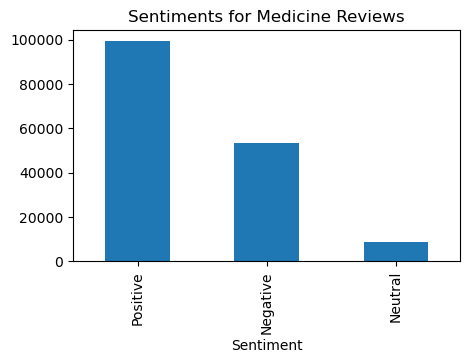

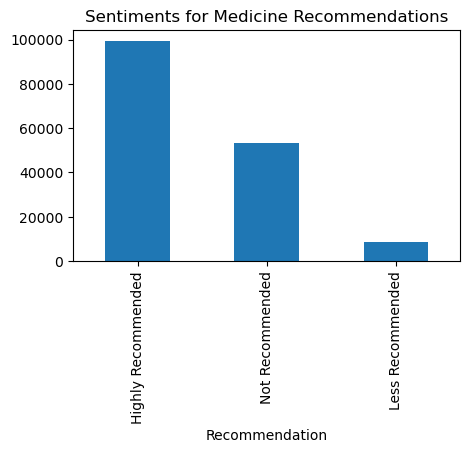

In [88]:
MdData1['Sentiment'].value_counts().plot(kind='bar', figsize=(5,3))
medrvp.title("Sentiments for Medicine Reviews")
medrvp.show()
MdData1['Recommendation'].value_counts().plot(kind='bar', figsize=(5,3))
medrvp.title("Sentiments for Medicine Recommendations")
medrvp.show()

In [82]:
RcmRvMdData=MdData1[["drugName","condition","rating","usefulCount","Sentiment","review",'cleaned_review']]
RcmRvMdData1=resample(RcmRvMdData,replace = True, n_samples = 20000, random_state = 10)
RcmRvMdData1=RcmRvMdData1.fillna("NA")
RcmRvMdData1=resample(RcmRvMdData1,replace = True, n_samples = len(RcmRvMdData1)*2, random_state = 10)
RcmRvMdData1.info()
RcmRvMdData1

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 121314 to 102896
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   drugName        40000 non-null  object 
 1   condition       40000 non-null  object 
 2   rating          40000 non-null  float64
 3   usefulCount     40000 non-null  int64  
 4   Sentiment       40000 non-null  object 
 5   review          40000 non-null  object 
 6   cleaned_review  40000 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.4+ MB


,drugName,condition,rating,usefulCount,Sentiment,review,cleaned_review
121314,Gabapentin,Pain,10.0,11,Neutral,"""I have avascular necrosis and have been takin...",avascular necrosis taking neurotin year mg fou...
78208,Tri-Sprintec,Birth Control,8.0,7,Positive,"""I&#039;ve been on Tri Sprintec for 3 months n...",ive tri sprintec month noticed sickness nausea...
52751,Colesevelam,"Diarrhea, Chronic",10.0,113,Positive,"""After 41 years of horrible pain, diarrhea and...",year horrible pain diarrhea incontinency met g...
143471,Cipro,Urinary Tract Infection,10.0,26,Positive,"""Worked great for this.""",worked great
28207,Escitalopram,Depression,8.0,145,Positive,"""Been on Lexapro for 4 years now. Have taken a...",lexapro year taken ssri year battle generalize...
...,...,...,...,...,...,...,...
50134,Seroquel,Bipolar Disorde,6.0,20,Negative,"""I&#039;ve been using this drug for almost eig...",ive using drug almost eight year absolutely co...
158253,Yohimbine,"Sexual Dysfunction, SSRI Induced",6.0,21,Neutral,"""Heart was 180bpm, flushed, nausea, but got an...",heart bpm flushed nausea got erection
90892,Strattera,ADHD,10.0,50,Positive,"""My son was in kindergarten when he was diagno...",son kindergarten diagnosed adhd strattera seco...
61136,Aubra,Birth Control,3.0,4,Negative,"""I just turn 18 , never been on birth control ...",turn never birth control started taking pill f...


In [89]:
X=RcmRvMdData1['cleaned_review']
y=RcmRvMdData1['Sentiment']
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,y,train_size=0.75,stratify=y,random_state=32)
print(y_test.value_counts())
print("\n")
print(y_train.value_counts())
print("\n")

Uni_MedTF=[[],[],[],[],[],[]]
tfvect_1=TfidfVectorizer(stop_words='english', analyzer='word',max_df=0.8,ngram_range=(1,1))
UniTFTr=tfvect_1.fit_transform(x_train) 
UniTFTs=tfvect_1.transform(x_test)
print("Total Feature (TFIDF + Unigram): {}".format(UniTFTr.shape))

Bi_MedTF=[[],[],[],[],[],[]]
tfvect_1=TfidfVectorizer(stop_words='english', analyzer='word',max_df=0.7,ngram_range=(2,2))
BiTFTr=tfvect_1.fit_transform(x_train) 
BiTFTs=tfvect_1.transform(x_test)
print("Total Feature (TFIDF + Bigram): {}".format(BiTFTr.shape))

Uni_MedCV=[[],[],[],[],[],[]]
cvvect_1=CountVectorizer(stop_words='english', analyzer='word',max_df=0.7,ngram_range=(1,1))
UniCVTr=cvvect_1.fit_transform(x_train) 
UniCVTs=cvvect_1.transform(x_test)
print("Total Feature (BOW + Unigram): {}".format(UniCVTr.shape))

Bi_MedCV=[[],[],[],[],[],[]]
cvvect_1=CountVectorizer(stop_words='english', analyzer='word',max_df=0.7,ngram_range=(2,2))
BiCVTr=cvvect_1.fit_transform(x_train) 
BiCVTs=cvvect_1.transform(x_test)
print("Total Feature (BOW + Bigram): {}".format(BiCVTr.shape))

Sentiment
Positive    6216
Negative    3256
Neutral      528
Name: count, dtype: int64


Sentiment
Positive    18647
Negative     9770
Neutral      1583
Name: count, dtype: int64


Total Feature (TFIDF + Unigram): (30000, 21711)
Total Feature (TFIDF + Bigram): (30000, 271261)
Total Feature (BOW + Unigram): (30000, 21711)
Total Feature (BOW + Bigram): (30000, 271261)
